In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

#### Description of Project and Dataset
This Jupyter notebook serves as my submission for the "Writing a Data Scientist Blog Post" project for the Udacity Data Scientist Nanodegree.

I'll be using the Seattle Airbnb dataset to answer the following 4 questions, following the CRISP-DM process, that will hopefully be of interest and of use to Airbnb homeowners and renters:

1. Which is the busiest month of the year for Airbnbs in Seattle?
2. How much do prices increase for the busiest months in the year for Airbnbs in Seattle?
3. Does the popularity (availability) of Airbnb homes correlate to their review score?
4. Does the popularity (availability) of Airbnb homes correlate to their price?

#### 1. Which is the busiest month of the year for Airbnbs in Seattle?

In [2]:
seattleCalendar = pd.read_csv('../input/seattle/calendar.csv')
seattleCalendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
seattleCalendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
# To better work with the data in the 'available column', I'll replace the t/f values to 1/0 int values 
seattleCalendar['available'].replace({'t': '1', 'f': '0'}, inplace=True)
seattleCalendar['available'] = seattleCalendar['available'].astype(str).astype(int)

# Similarly, I'll convert the 'date' column from object Dtype to datetime Dtype for me to work with it easier 
seattleCalendar['date'] = pd.to_datetime(seattleCalendar['date'])

# Dropping columns that I'll not need for this particular question I'm answering
seattleCalendarAvail = seattleCalendar.drop(['listing_id', 'price'], axis=1)
seattleCalendarAvail.head()

,date,available
0,2016-01-04,1
1,2016-01-05,1
2,2016-01-06,0
3,2016-01-07,0
4,2016-01-08,0


In [5]:
# Adding 'month' and 'year' columns by extracting it from the 'date' column
seattleCalendarAvail['month'] = [i.month for i in seattleCalendarAvail['date']]
seattleCalendarAvail['year'] = [i.year for i in seattleCalendarAvail['date']]

In [6]:
seattleCalendarAvail.head()

,date,available,month,year
0,2016-01-04,1,1,2016
1,2016-01-05,1,1,2016
2,2016-01-06,0,1,2016
3,2016-01-07,0,1,2016
4,2016-01-08,0,1,2016


In [7]:
# Grouping the average of the 'available' column by month and year
# For the 'available' column, an average closer to 1 indicates higher availability (less popular) and vice versa
seattleCalendarAvail = seattleCalendarAvail.groupby(['month', 'year']).mean()
seattleCalendarAvail.head()

available
month year           
1     2016   0.554133
      2017   0.746202
2     2016   0.662208
3     2016   0.709187
4     2016   0.663847

In [8]:
# Unstacking the 'month' column
seattleCalendarAvail = seattleCalendarAvail.unstack(level=0)
seattleCalendarAvail.head()

available                                                             \
month        1         2         3         4        5         6         7    
year                                                                         
2016   0.554133  0.662208  0.709187  0.663847  0.67567  0.674384  0.627097   
2017   0.746202       NaN       NaN       NaN      NaN       NaN       NaN   

                                                         
month        8         9         10        11        12  
year                                                     
2016   0.645051  0.674402  0.696514  0.713986  0.735573  
2017        NaN       NaN       NaN       NaN       NaN

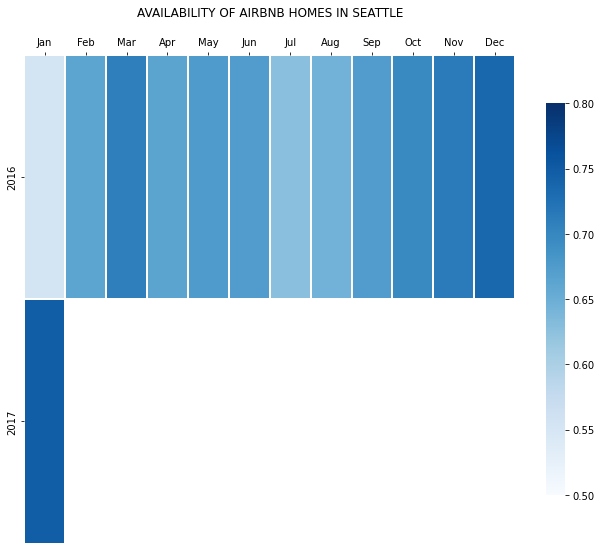

In [9]:
# Using seaborn heatmap for visualization of availability during the different months
fig, ax = plt.subplots(figsize=(11, 9))

sb.heatmap(seattleCalendarAvail, cmap="Blues", vmin= 0.5, vmax=0.8,
           linewidth=0.3, cbar_kws={"shrink": .8})

ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

plt.xlabel('')
plt.ylabel('')

title = 'Availability of Airbnb Homes in Seattle\n'.upper()
plt.title(title, loc='center')

plt.show()

#### Results
From the heatmap, it can be observed that Jan was the busiest month in 2016 with an average availability of only **0.55**. Jul and Aug are the next 2 busiest months in 2016.

What is interesting is that in 2017, Jan appears to be significantly less busy, with an average availability of **0.75**. The reason for this could be incomplete data or perhaps uncommon events that caused Jan 2016 to be busier than Jan 2017 for Airbnbs in July. We will need a larger and complete dataset to be certain about this discrepancy.

#### 2. How much do prices increase for the busiest months in the year for Airbnbs in Seattle?

In [10]:
seattleCalendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [11]:
# Checking for NaN values in each of the columns
a = seattleCalendar['listing_id'].isna().sum()
b = seattleCalendar['date'].isna().sum()
c = seattleCalendar['available'].isna().sum()
d = seattleCalendar['price'].isna().sum()

print('#Nan in listing_id = {}, #Nan in date = {}, #Nan in available = {}, #Nan in price = {}'.format(a, b, c, d))

#Nan in listing_id = 0, #Nan in date = 0, #Nan in available = 0, #Nan in price = 459028


In [12]:
print("Percentage of Nan values in 'price' columne is " + str(round(d/seattleCalendar.shape[0]*100,2)) + '%')

Percentage of Nan values in 'price' columne is 32.94%


In [13]:
# Dropping rows with NaN values in 'price' column as it is essential for answering this question
seattleCalendarPrice = seattleCalendar.dropna(subset=['price'])

In [14]:
seattleCalendarPrice['month'] = [i.month for i in seattleCalendarPrice['date']]
seattleCalendarPrice['year'] = [i.year for i in seattleCalendarPrice['date']]
seattleCalendarPrice.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,$85.00,1,2016
1,241032,2016-01-05,1,$85.00,1,2016
9,241032,2016-01-13,1,$85.00,1,2016
10,241032,2016-01-14,1,$85.00,1,2016
14,241032,2016-01-18,1,$85.00,1,2016


In [15]:
# Removing symbols '$' and ',' so that I can work with the 'price' column
seattleCalendarPrice['price'] = seattleCalendarPrice['price'].str.replace('$', '')
seattleCalendarPrice['price'] = seattleCalendarPrice['price'].str.replace(',', '')
seattleCalendarPrice['price'] = seattleCalendarPrice['price'].astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from 

In [16]:
seattleCalendarPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  int64         
 3   price       934542 non-null  float64       
 4   month       934542 non-null  int64         
 5   year        934542 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 49.9 MB


In [17]:
# Dropping unnecessary columns
seattleCalendarPrice = seattleCalendarPrice.drop(['listing_id', 'available'], axis=1)

In [18]:
seattleCalendarPrice.head()

,date,price,month,year
0,2016-01-04,85.0,1,2016
1,2016-01-05,85.0,1,2016
9,2016-01-13,85.0,1,2016
10,2016-01-14,85.0,1,2016
14,2016-01-18,85.0,1,2016


In [19]:
seattleCalendarPrice = seattleCalendarPrice.groupby(['month', 'year']).mean()
seattleCalendarPrice.head()

price
month year            
1     2016  121.568409
      2017  136.882590
2     2016  124.293927
3     2016  128.644488
4     2016  135.097005

In [20]:
seattleCalendarPrice = seattleCalendarPrice.unstack(level=0)
seattleCalendarPrice.head()

price                                                              \
month          1           2           3           4           5           6    
year                                                                            
2016   121.568409  124.293927  128.644488  135.097005  139.538183  147.473137   
2017   136.882590         NaN         NaN         NaN         NaN         NaN   

                                                                              
month         7           8           9           10          11          12  
year                                                                          
2016   152.09415  150.656594  143.255949  137.031939  135.688738  137.251835  
2017         NaN         NaN         NaN         NaN         NaN         NaN

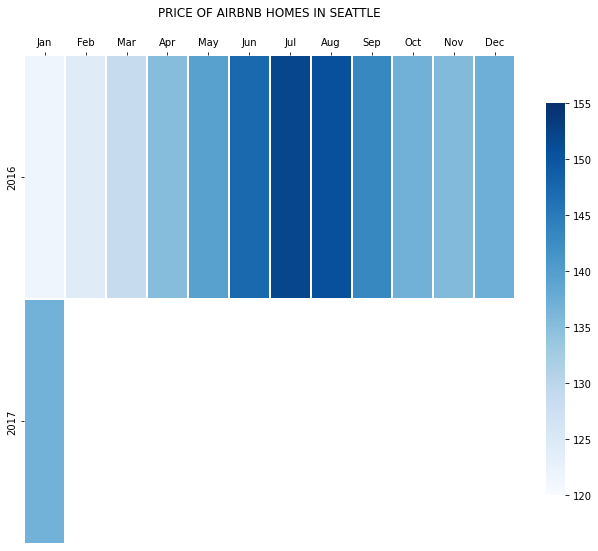

In [21]:
fig, ax = plt.subplots(figsize=(11, 9))

sb.heatmap(seattleCalendarPrice, cmap="Blues", vmin= 120, vmax=155,
           linewidth=0.3, cbar_kws={"shrink": .8})

ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

plt.xlabel('')
plt.ylabel('')

title = 'Price of Airbnb Homes in Seattle\n'.upper()
plt.title(title, loc='center')

plt.show()

#### Results
From the previous question. we have established that the top 3 busiest months in 2016 are Jan > Jul > Aug, in descending order of "busyness".

However, it was not the case that Jan 2016 had the highest average price of Airbnb rentals. The highest average cost of Airbnb rentals happened in Jul followed by Aug in 2016. This abonomaly could be because of the NaN values dropped earlier. Let's investigate if majority of the values dropped were from Jan 2016.

In [22]:
# Get the rows in which there are NaN values in 'price' column
NanPriceDf = seattleCalendar[seattleCalendar['price'].isnull()]
NanPriceDf['month'] = [i.month for i in NanPriceDf['date']]
NanPriceDf['year'] = [i.year for i in NanPriceDf['date']]
NanPriceDf.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,listing_id,date,available,price,month,year
2,241032,2016-01-06,0,NaN,1,2016
3,241032,2016-01-07,0,NaN,1,2016
4,241032,2016-01-08,0,NaN,1,2016
5,241032,2016-01-09,0,NaN,1,2016
6,241032,2016-01-10,0,NaN,1,2016


In [23]:
NanPriceDf.month.value_counts()

1     49603
7     44136
8     42011
4     38503
5     38387
2     37401
6     37296
9     37294
10    35920
3     34420
11    32760
12    31297
Name: month, dtype: int64

It doesn't seem to be the case that majority of NaN values was from Jan 2016 and it is thus unlikely that the discrepancy in prices was due to the NaN values in the price column. However, we can try imputing the values using the mean of the price of the Airbnb listing in the month and determine if there is any difference in our conclusion.

In [24]:
seattleCalendarPriceV2 = seattleCalendar.copy()
seattleCalendarPriceV2['month'] = [i.month for i in seattleCalendarPriceV2['date']]
seattleCalendarPriceV2['year'] = [i.year for i in seattleCalendarPriceV2['date']]
seattleCalendarPriceV2['price'] = seattleCalendarPriceV2['price'].str.replace('$', '')
seattleCalendarPriceV2['price'] = seattleCalendarPriceV2['price'].str.replace(',', '')
seattleCalendarPriceV2['price'] = seattleCalendarPriceV2['price'].astype(float)
seattleCalendarPriceV2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.0,1,2016
1,241032,2016-01-05,1,85.0,1,2016
2,241032,2016-01-06,0,NaN,1,2016
3,241032,2016-01-07,0,NaN,1,2016
4,241032,2016-01-08,0,NaN,1,2016


In [25]:
# We need to come up with a function to fillna by the mean conditional on the month and year
def replace_missing_with_conditional_mean(df, condition_cols, cols):
    '''
    replaces NaN values in an input df with the mean of the subset of the column, conditional 
    on the values of specified columns
    
    input:
            df: dataframe with NaN values
            conditional_cols: columns which values to be conditional on
            cols: columns with NaN values to be replaced
    output:
            new_df: dataframe with NaN values replaced by conditional mean
    '''
    
    s = df.groupby(condition_cols)[cols].transform('mean')
    new_df = df.fillna(s)
    
    return new_df

seattleCalendarPriceV2 = replace_missing_with_conditional_mean(seattleCalendarPriceV2, ['month', 'year'], ['price'])
seattleCalendarPriceV2.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.000000,1,2016
1,241032,2016-01-05,1,85.000000,1,2016
2,241032,2016-01-06,0,121.568409,1,2016
3,241032,2016-01-07,0,121.568409,1,2016
4,241032,2016-01-08,0,121.568409,1,2016


In [26]:
seattleCalendarPriceV2 = seattleCalendarPriceV2.drop(['listing_id', 'available'], axis=1)
seattleCalendarPriceV2 = seattleCalendarPriceV2.groupby(['month', 'year']).mean()
seattleCalendarPriceV2 = seattleCalendarPriceV2.unstack(level=0)
seattleCalendarPriceV2.head()

price                                                              \
month          1           2           3           4           5           6    
year                                                                            
2016   121.568409  124.293927  128.644488  135.097005  139.538183  147.473137   
2017   136.882590         NaN         NaN         NaN         NaN         NaN   

                                                                              
month         7           8           9           10          11          12  
year                                                                          
2016   152.09415  150.656594  143.255949  137.031939  135.688738  137.251835  
2017         NaN         NaN         NaN         NaN         NaN         NaN

There appears to be no difference in the values before and after imputing with the mean. This makes perfect sense as the mean before and after replacing NaN values with the mean will be the same! However, this does not mean that our efforts are put to waste as we will have more data points to work with in further questions if we need to.

In [27]:
seattleCalendarPriceV2['mean'] = seattleCalendarPriceV2.mean(axis=1)
seattleCalendarPriceV2

price                                                              \
month           1           2           3           4           5           6   
year                                                                            
2016   121.568409  124.293927  128.644488  135.097005  139.538183  147.473137   
2017   136.882590         NaN         NaN         NaN         NaN         NaN   

                                                                              \
month          7           8           9          10          11          12   
year                                                                           
2016   152.09415  150.656594  143.255949  137.031939  135.688738  137.251835   
2017         NaN         NaN         NaN         NaN         NaN         NaN   

             mean  
month              
year               
2016   137.716196  
2017   136.882590

In [28]:
priceIncreaseJul2016 = round((152.09415 - 137.716196)/137.716196,2) * 100
priceIncreaseAug2016 = round((150.656594 - 137.716196)/137.716196,2) * 100
print(priceIncreaseJul2016,priceIncreaseAug2016)

10.0 9.0


To conclude Question 3, ignoring Jan 2016, the price of Airbnb rentals in seattle increased by 10% in Jul 2016 and 9% in Aug 2016 on average.

#### 3. Does the popularity (availability) of Airbnb homes correlate to their review score?

In [29]:
# Dropping unnecessary columns
seattleCalendarReview = seattleCalendar.drop(['date','price'], axis=1)

In [30]:
seattleCalendarReview = seattleCalendarReview.groupby(['listing_id']).mean()
seattleCalendarReview.reset_index()

,listing_id,available
0,3335,0.846575
1,4291,1.000000
2,5682,0.846575
3,6606,1.000000
4,7369,0.145205
...,...,...
3813,10332096,1.000000
3814,10334184,0.989041
3815,10339144,0.000000
3816,10339145,1.000000


In [31]:
# Reading in the new dataset and renaming to columns to facilitate merging
seattleListings = pd.read_csv('../input/seattle/listings.csv')
seattleListings.rename(columns = {'id':'listing_id'}, inplace = True)

In [32]:
# Merging the two datasets based on listing_id
listingAvailReviews = pd.merge(seattleCalendarReview,seattleListings[['listing_id','review_scores_value','reviews_per_month']],on='listing_id', how='left')

In [33]:
listingAvailReviews.head()

,listing_id,available,review_scores_value,reviews_per_month
0,3335,0.846575,NaN,NaN
1,4291,1.000000,9.0,1.14
2,5682,0.846575,10.0,4.21
3,6606,1.000000,9.0,0.66
4,7369,0.145205,9.0,0.50


In [34]:
# Checking NaN values in newly merged dataset
a = listingAvailReviews['listing_id'].isna().sum()
b = listingAvailReviews['available'].isna().sum()
c = listingAvailReviews['review_scores_value'].isna().sum()
d = listingAvailReviews['reviews_per_month'].isna().sum()

print('#Nan in listing_id = {}, #Nan in available = {}, #Nan in review_scores_value = {}, #Nan in reviews_per_month = {}'.format(a, b, c, d))

#Nan in listing_id = 0, #Nan in available = 0, #Nan in review_scores_value = 656, #Nan in reviews_per_month = 627


In [35]:
# Dropping NaN values in columns 'review_scores_value' and 'reviews_per_month' 
listingAvailReviews.dropna(subset=['review_scores_value', 'reviews_per_month'], inplace = True)
listingAvailReviews.head()

,listing_id,available,review_scores_value,reviews_per_month
1,4291,1.000000,9.0,1.14
2,5682,0.846575,10.0,4.21
3,6606,1.000000,9.0,0.66
4,7369,0.145205,9.0,0.50
5,9419,1.000000,9.0,1.19


In [36]:
# Determining the correlation between variables
listingAvailReviews.corr().style.background_gradient(cmap="Blues")


,listing_id,available,review_scores_value,reviews_per_month
listing_id,1.000000,-0.146523,0.087858,0.096377
available,-0.146523,1.000000,-0.066565,0.002623
review_scores_value,0.087858,-0.066565,1.000000,0.126014
reviews_per_month,0.096377,0.002623,0.126014,1.000000


There doesn't seem to be any correlation between the popularity (availability) of Airbnb homes and their review scores. Why is this so? It makes logical sense for Airbnb homes with higher review scores to have lower availability due to the concept of social proof - people would want to stay in a Airbnb which is better reviewed. Hence, I expected 'available' to have a negative correlation to 'review_scores_value'.

The reason for this could be that there are other factors that matter more to renters such as price, which I'll be exploring in the next question.

#### 4. Does the popularity (availability) of Airbnb homes correlate to their price?

In [37]:
seattlePopular = seattleCalendar.drop(['date'], axis=1)
seattlePopular['price'] = seattlePopular['price'].str.replace('$', '')
seattlePopular['price'] = seattlePopular['price'].str.replace(',', '')
seattlePopular['price'] = seattlePopular['price'].astype(float)
seattlePopular.available.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


1    934542
0    459028
Name: available, dtype: int64

In [38]:
seattlePopular.dropna(subset=['price'], inplace = True)
seattlePopular.available.value_counts()

1    934542
Name: available, dtype: int64

Notice that when I removed rows with NaN values in 'price', all rows with 0 in 'available' was removed as well. This is an interesting point I just realized about the Seattle dataset. Airbnb does not provide price data for homes that were booked (i.e. with availability = 0). This means I can't simply remove all rows with NaN values in the 'price' column.

The best we can do is simply impute the values using the mean of the Airbnb listing in that particular month and year, as we have done previously.

In [39]:
seattlePopular = seattleCalendar.copy()
seattlePopular['month'] = [i.month for i in seattlePopular['date']]
seattlePopular['year'] = [i.year for i in seattlePopular['date']]
seattlePopular['price'] = seattlePopular['price'].str.replace('$', '')
seattlePopular['price'] = seattlePopular['price'].str.replace(',', '')
seattlePopular['price'] = seattlePopular['price'].astype(float)
seattlePopular.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.0,1,2016
1,241032,2016-01-05,1,85.0,1,2016
2,241032,2016-01-06,0,NaN,1,2016
3,241032,2016-01-07,0,NaN,1,2016
4,241032,2016-01-08,0,NaN,1,2016


In [40]:
def replace_missing_with_conditional_mean(df, condition_cols, cols):
    '''
    replaces NaN values in an input df with the mean of the subset of the column, conditional 
    on the values of specified columns
    
    input:
            df: dataframe with NaN values
            conditional_cols: columns which values to be conditional on
            cols: columns with NaN values to be replaced
    output:
            new_df: dataframe with NaN values replaced by conditional mean
    '''
    
    s = df.groupby(condition_cols)[cols].transform('mean')
    new_df = df.fillna(s)
    
    return new_df

seattlePopular = replace_missing_with_conditional_mean(seattlePopular, ['month', 'year'], ['price'])
seattlePopular.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.000000,1,2016
1,241032,2016-01-05,1,85.000000,1,2016
2,241032,2016-01-06,0,121.568409,1,2016
3,241032,2016-01-07,0,121.568409,1,2016
4,241032,2016-01-08,0,121.568409,1,2016


In [41]:
seattlePopular.drop(['date', 'month', 'year'], axis=1, inplace = True)
seattlePopular.head()

,listing_id,available,price
0,241032,1,85.000000
1,241032,1,85.000000
2,241032,0,121.568409
3,241032,0,121.568409
4,241032,0,121.568409


In [42]:
seattlePopular = seattlePopular.groupby(['listing_id']).mean()
seattlePopular.head()

,available,price
listing_id,,
3335,0.846575,120.449713
4291,1.000000,82.000000
5682,0.846575,65.275291
6606,1.000000,92.849315
7369,0.145205,131.806329


In [43]:
seattlePopular.corr().style.background_gradient(cmap="Blues")

,available,price
available,1.000000,-0.012546
price,-0.012546,1.000000


It appears there is no strong correlation between the popularity of airbnb homes and their prices.

#### Conclusion
Firstly, it has to be put across that the Seattle Airbnb data used for this analysis was limited in several areas. It only provided data for 2016 and Jan of 2017 and there were no data for the price of listings on the days which it was booked.

With this data, we concluded that for 2016, Jan was the busiest month for Airbnbs in Seattle, followed by Jul and Aug. However, the average price of Airbnbs were the lowest in Jan. Jul had the highest average price followed by Aug.

We then determined that there were no correlation between either review scores and price, and the popularity of an Airbnb unit. There are other factors such as location which can be explored in future work to determine what matters to Airbnb renters and how homeowners can make their Airbnb more popular to them.